# Part - 1
## Cleaning and Analyzing "US Census Data"

In [182]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [183]:
us_census = pd.concat([pd.read_csv(files) for files in glob.glob('states*.csv')], ignore_index = True)
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [184]:
print(us_census.columns)
print()
for col in us_census.columns:
    print(us_census[col].dtype)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

int64
object
int64
object
object
object
object
object
object
object
object


In [185]:
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [186]:
# Use regex to turn the Income column into a format that is ready for conversion into a numerical type.
match = "$"
us_census["Income"] = us_census["Income"].str.replace(match, "")
us_census["Income"] = us_census["Income"].apply(pd.to_numeric)
print(us_census.dtypes)
display(us_census.head())

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F


In [187]:
us_census[['Male','Female']] = us_census.GenderPop.str.split("_",expand=True) 
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135M,19334329F


In [188]:
male = "M"
female = "F"
us_census["Male"] = us_census["Male"].str.replace(male, "")
us_census["Female"] = us_census["Female"].str.replace(female, "")
display(us_census.head())

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329


In [189]:
us_census[['Male','Female']] = us_census[['Male','Female']].apply(pd.to_numeric)
print(us_census.dtypes)
display(us_census.head())

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Male            int64
Female        float64
dtype: object


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


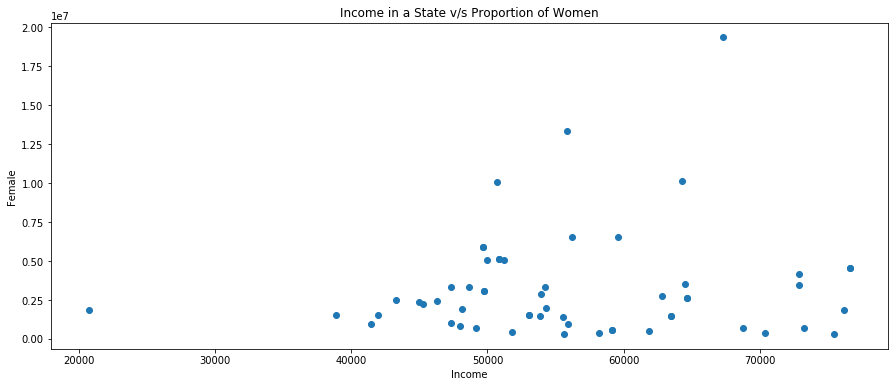

In [190]:
#display(us_census)
plt.figure(figsize=(15, 6))
plt.xlabel('Income')
plt.ylabel('Female')
plt.title("Income in a State v/s Proportion of Women")
plt.scatter(us_census["Income"], us_census["Female"])
plt.show()

In [191]:
print(us_census.isnull().any())
# us_census.notnull()

us_census["Female"] = us_census["Female"].fillna(value = us_census["TotalPop"] - us_census["Male"])
display(us_census["Female"])
us_census.isnull().any()
us_census.duplicated()

Unnamed: 0    False
State         False
TotalPop      False
Hispanic      False
White         False
Black         False
Native        False
Asian         False
Pacific        True
Income        False
GenderPop     False
Male          False
Female         True
dtype: bool


0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [192]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

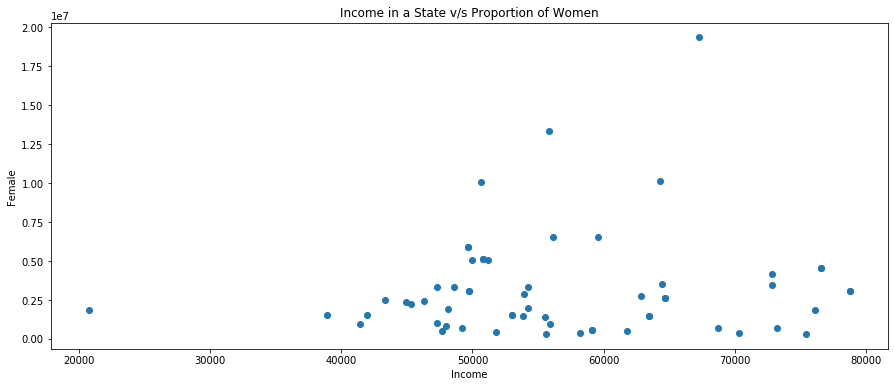

In [193]:
plt.figure(figsize=(15, 6))
plt.xlabel('Income')
plt.ylabel('Female')
plt.title("Income in a State v/s Proportion of Women")
plt.scatter(us_census["Income"], us_census["Female"])
plt.show()

In [194]:
race = us_census[["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]
display(race.head())

,Hispanic,White,Black,Native,Asian,Pacific
0,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%
1,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%
2,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%
3,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%
4,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%


In [195]:
print(race.dtypes)
percent = "%"
race = race.replace(percent, "", regex=True)
race = race.apply(pd.to_numeric)
display(race.head(20))
print(race.dtypes)

Hispanic    object
White       object
Black       object
Native      object
Asian       object
Pacific     object
dtype: object


,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410
5,20.784380,69.895572,3.546377,0.573833,2.661997,NaN
6,20.784380,69.895572,3.546377,0.573833,2.661997,NaN
7,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599
8,8.824766,64.632710,20.743925,0.259813,3.268692,NaN
9,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609


Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object


In [196]:
print(race.isnull().any())
print()
race["Pacific"] = race["Pacific"].fillna(value = 100 - (race.Hispanic + race.White + race.Black + race.Native + race.Asian))
print(race.isnull().any())
display(race.head(20))

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific     False
dtype: bool


,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410
5,20.784380,69.895572,3.546377,0.573833,2.661997,2.537842
6,20.784380,69.895572,3.546377,0.573833,2.661997,2.537842
7,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599
8,8.824766,64.632710,20.743925,0.259813,3.268692,2.270093
9,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609


In [197]:
print(race.duplicated())
display(len(race))
race.drop_duplicates(keep=False,inplace=True)
display(len(race))
print(race.duplicated())
display(len(race))

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool


60

42

0     False
1     False
2     False
3     False
4     False
7     False
8     False
9     False
10    False
13    False
14    False
15    False
16    False
19    False
20    False
21    False
22    False
25    False
26    False
27    False
28    False
31    False
32    False
33    False
34    False
37    False
38    False
39    False
40    False
43    False
44    False
45    False
46    False
49    False
50    False
51    False
52    False
55    False
56    False
57    False
58    False
59    False
dtype: bool


42

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218851D2608>,
      dtype=object)

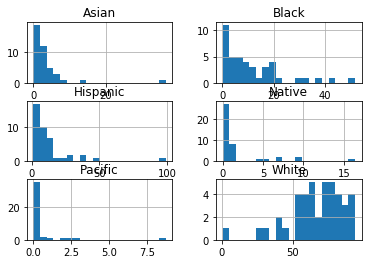

In [198]:
# Plotting Histogram of each Race

race.hist(bins = 20)

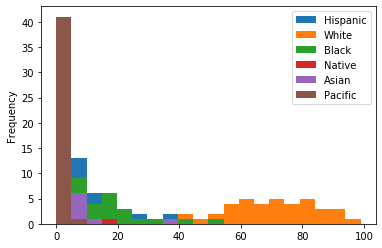

In [199]:
# Plotting Histogram Combined

race.plot.hist(bins = 20)

# Part - 2
## Petal Power Inventory

In [200]:
import pandas as pd
import numpy as np

In [201]:
! type "inventory.csv"

location,product_type,product_description,quantity,price
Staten Island,seeds,daisy,4,6.99
Staten Island,seeds,calla lily,46,19.99
Staten Island,seeds,tomato,85,13.99
Staten Island,garden tools,rake,4,13.99
Staten Island,garden tools,wheelbarrow,0,89.99
Staten Island,garden tools,spade,93,19.99
Staten Island,pest_control,insect killer,74,12.99
Staten Island,pest_control,weed killer,8,23.99
Staten Island,planter,20 inch terracotta planter,0,17.99
Staten Island,planter,8 inch plastic planter,53,3.99
Brooklyn,seeds,daisy,50,6.99
Brooklyn,seeds,calla lily,0,19.99
Brooklyn,seeds,tomato,0,13.99
Brooklyn,garden tools,rake,15,13.99
Brooklyn,garden tools,wheelbarrow,82,89.99
Brooklyn,garden tools,spade,36,19.99
Brooklyn,pest_control,insect killer,80,12.99
Brooklyn,pest_control,weed killer,76,23.99
Brooklyn,planter,20 inch terracotta planter,5,17.99
Brooklyn,planter,8 inch plastic planter,26,3.99
Queens,seeds,daisy,57,6.99
Queens,seeds,calla lily,95,19.99
Queens,seeds,tomato,45,13.99
Queens,garde

In [202]:
inventory = pd.read_csv("inventory.csv")
# display(inventory.head(10))
staten_island = inventory[:10]
# display(staten_island)
product_request = staten_island.product_type
display(product_request)
a, b , c ,d = product_request.unique()
print("Products sold in Staten Island are: {0}, {1}, {2}, and {3}".format(a, b, c, d))

0           seeds
1           seeds
2           seeds
3    garden tools
4    garden tools
5    garden tools
6    pest_control
7    pest_control
8         planter
9         planter
Name: product_type, dtype: object

Products sold in Staten Island are: seeds, garden tools, pest_control, and planter


In [203]:
brooklyn = inventory[inventory.location == "Brooklyn"]
seed_request = brooklyn[brooklyn.product_type == "seeds"]
display(seed_request)
t1, t2, t3 = seed_request.product_description.unique()
print("The types of seeds in Brooklyn is: {0}, {1}, and {2}".format(t1, t2, t3))

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


The types of seeds in Brooklyn is: daisy, calla lily, and tomato


In [204]:
# Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.
inventory["in_stock"] = inventory.quantity > 0
display(inventory)

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [205]:
# Petal Power wants to know how valuable their current inventory is.
# Create a column called total_value that is equal to price multiplied by quantity.

inventory["total_value"] = inventory.price * inventory.quantity
display(inventory)

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [208]:
# The Marketing department wants a complete description of each product for their catalog.
# The following lambda function combines product_type and product_description into a single string:
# combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)

combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)
inventory["full_description"] = inventory.apply(combine_lambda, axis = 1)
display(inventory.head())

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow


In [209]:
# The above step can also be done as following:

inventory["full_description"] = inventory["product_type"].str.cat(inventory["product_description"], sep = " - ")
display(inventory.head())

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
